# Dashboard de Coyuntura Económica - Equipo 2

Presentan:

* **Cárdenas Gallardo Paula Daniela** – 733720 – Ingeniería y Ciencia de Datos

* **González Álvarez Vidal** – 45468– Ingeniería en Sistemas Computacionales

* **Gutiérrez Estrada Gerardo** – 729878 – Ingeniería Financiera

* **Villa Domínguez Paulo Adrián** – 733773 – Ingeniería y Ciencia de Datos


---
El dashboard de coyuntura económica tiene como propósito mostrar la información más relevante de cuatro diferentes tipos de activos.
 
En primer lugar, los CETES, los cuales, con Certificados de Tesorería de la Federación, se emitieron por primera vez en 1978, y son títulos de crédito, ¿qué significa esto? En pocas palabras le estás prestando dinero al gobierno mexicano por un tiempo determinado. Al invertir en CETES obtendrás un rendimiento fijo, representado por un porcentaje, sin embargo, la realidad es que estas comprando el CETES a un valor menor a su valor nominal de 10 pesos, y recibiendo su valor nominal al vencimiento. Los CETES son considerados una inversión con un riesgo muy bajo, y representativos de la tasa libre de riesgo si estás hablando de pesos mexicanos.
 
El segundo tipo de activo que podrás visualizar en el dashboard son acciones y en este caso, acciones de empresas públicas. Las acciones son las unidades de capital que dividen la propiedad de una empresa. Una empresa emite un cierto número de acciones y establece un valor inicial al salir a la bolsa, sin embargo, este precio va fluctuando en base a la oferta y demanda de la acción en el mercado. Las empresas privadas también están compuestas por acciones y sus respectivos accionistas, pero su valor no lo podemos ver en tiempo real, y sus activos mucho menos líquidos, la liquidez de un activo se refiere a que tan fácil es convertir ese activo en dinero.
 
En tercer lugar, son los índices principales del mercado, los cuales hacen referencia a diferentes grupos de empresas y pueden dar perspectiva a la situación del mercado en conjunto. Un índice está compuesto por muchas empresas, de un sector en específico o en el caso del S & P 500, las 500 empresas más grandes por capitalización en Estados Unidos. Para poder comprar una posición en un índice, anteriormente se compraban títulos por medio de una empresa que se dedicaba a replicarlo, actualmente también se puede hacer por medio de ETFs, que se pueden comprar y vender como acciones.
 
Finalmente, el dashboard también va a permitir al usuario ver la valuación de las diferentes monedas alrededor del mundo. En las que se podrá ver la comparación entre monedas, por ejemplo, USD/MXN, que representa la comparación entre el preso y el dólar, por cada dólar cuántos pesos puedes comprar, estas valuaciones se determinan por medio de oferta y demanda.dmanda.


In [1]:
# Importar librerías 
import pandas as pd
import requests
import warnings
import yfinance as yf
import plotly.express as px
import plotly.graph_objs as go
from config import a_v_token      # archivo de python con el api key de alpha vantage
from cetes import Cetes
from ipywidgets import interact
from datetime import datetime, timedelta


warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'config'

_(Imagen de referencia del dashboard)_
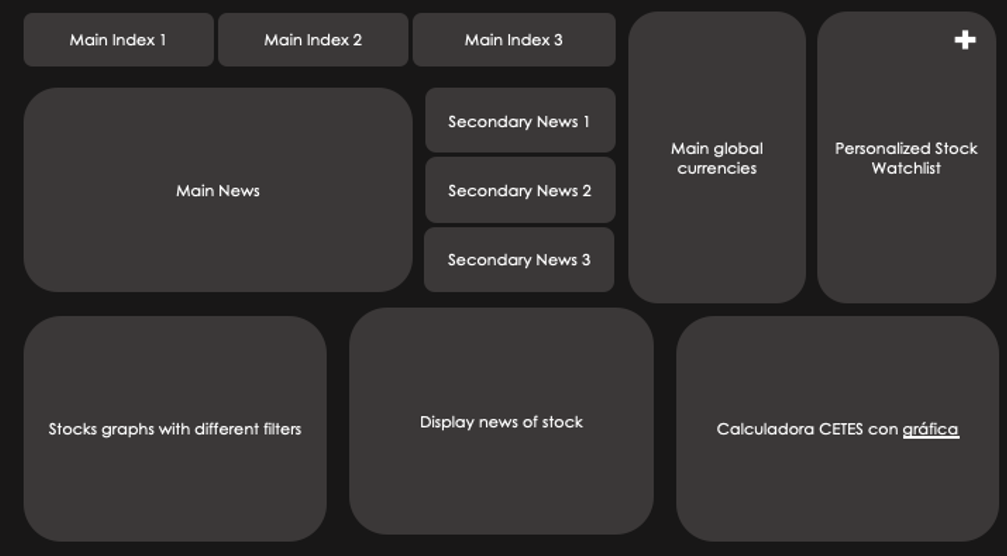

___
**`GRÁFICAS DE ACCIONES CON FILTROS`**

El proposito de esta sección del dashboard es darle al usuario la oportunidad de ver el precio de la acción que quiera en el rango de fechas que quiera. Dependiendo la intención del usuario, podra ver precios a corto o largo plazo.

In [ ]:
# Definir ticker y fechas
ticker = input('Ticker: ')
st_date = input('Fecha de inicio (AAAA-MM-DD): ')
end_date = input('Fecha de cierre (AAAA-MM-DD): ')

# Obtener los datos
data = yf.download(ticker, st_date, end_date, progress=False)

# Crear una figura de Plotly
fig = go.Figure()

# Agregar una línea de gráfica para el precio de cierre ajustado
fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', line=dict(color='maroon')))

# Configurar el título y etiquetas de los ejes
fig.update_layout(
    title=ticker,
    xaxis_title='Date',
    yaxis_title='Adj. Close Price',
    xaxis=dict(tickangle=-45)
)

___
**`NOTICIAS DE LA ACCIÓN`**

Las noticias de una acción pueden ser un factor importante en la oferta y demanda de la acción y por lo tanto su precio. La acción de una empresa que esta mostrando malas señales en las noticias, puede ser ampliamente afectada, asi mismo la acción de una empresa que lanzo un gran producto podría subir significativamente de precio. En esta parte del dashboard el usuario podra ver las noticias y la grafica del precio de la acción lado a lado y darse una buena idea de lo que esta pasando con la empresa.

Se utiliza la biblioteca `newspaper3k` que proporciona un método para generar el resumen de un artículo dada su liga que se obtiene a través del API de *alpha vantage*. Está inspirada en la librería `requests`, herramienta para realizar peticiones a servidores web, así como interactuar con Interfaces de Programación de Aplicaciones (APIs) y extraer contenido de páginas web (*web scraping*), e impulasda por la librería `lxml`, utilizada para el procesamiento de *XML* y *HTML*, que son lenguajes utilizados para estructurar y representar información en documentos web.

El resumen que se obtiene es una versión condensada de los puntos principales y la información clave del artículo, esto se logra mediante un algoritmo que determina qué oraciones en el artículo son las más importantes o representativas, combinando técnicas de procesamiento de lenguaje natural como las longitudes de oraciones, frecuencia de palabras y posición dentro del artículo. Esto quiere decir que `newspaper3k` extrae y analiza el contenido, lo divide en frases (tokenización), elimina palabras comunes (*stopwords* en inglés) y realiza limpieza pertinente. Se puntean las frases según su importancia de acuedo a la frecuencia de las palabras, su posición y longitud. Así, se seleccionan las oraciones clave para que, al combinarlas, se obtenga un resumen.

*_TODO_*: Explicar qué algoritmo que usa Google Translate. Docs: https://cloud.google.com/translate/docs#docs

In [ ]:
# Para tener las noticias en español
from googletrans import Translator
translator = Translator()

In [ ]:
def translate(text):
    return translator.translate(text , dest ='es').text 

In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={ticker}&time_from={st_date.replace('-', '')+'T0000'}&limit=3&sort=RELEVANCE&apikey={a_v_token}"
r = requests.get(url)
data = r.json()

In [ ]:
[translate(data['feed'][i]['summary']) for i in range(5)]

___
**`PRINCIPALES NOTICIAS DADO UN TEMA`**

Este apartado del dashboard le permite al usuario ver noticias de un tema financiero especifico. Por medio de esta herramienta el usuario tendra la oportunidad de ver lo mas relevante y actual de un tema de su interes. Por ejemplo, el estado del mercado de criptomonedas.

In [ ]:
# Seleccionar tema
topic = input('Tema: ')

url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&topics={topic}&limit=4&sort=RELEVANCE&apikey={a_v_token}'
r = requests.get(url)
data = r.json()

# Obtener las ligas
links = [data['feed'][i]['url'] for i in range(4)]

In [ ]:
# Librerías
from newspaper import Article
import nltk
nltk.download()                        # verificar que esté descargado

*Código inspirado de [towardsdatascience.com](https://towardsdatascience.com/scrape-and-summarize-news-articles-in-5-lines-of-python-code-175f0e5c7dfc) (Artem, 2019)*

In [ ]:
def get_summary(link):
    # Web Scrapping 
    article = Article(link)
    article.download()
    article.parse()
    article.nlp()
    return article.summary

In [ ]:
for new in range(len(links)):
    print(translate(get_summary(links[new])))
    print()

___
**`PRINCIPALES MONEDAS GLOBALES`**

Utilizando como referencia el peso mexicano, el usuario local podra ver el estado del peso contra otras monedas a nivel mundial, esta sección no es para traders de FOREX si no para la persona comun que quiere saber cuanto cuesta un dolar o un euro. En la tabla se podra visualizar el precio de compra y de venta y el spread que hay entre los dos precios (la diferencia entre precio de compra y venta).

In [ ]:
vs_currency = 'MXN'
currencies = ['USD','AUD','JPY', 'GBP']

currency_names = []
exchange_rate = {}
bid_price = {}
ask_price ={}

for c in currencies:
    url = f"https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency={c}&to_currency={vs_currency}&apikey={a_v_token}"
    r = requests.get(url)
    data = r.json()
    data = data['Realtime Currency Exchange Rate']
    currency_names.append(f"{c}/{vs_currency}")
    exchange_rate[c] = data['5. Exchange Rate']
    bid_price[c] = data['8. Bid Price']
    ask_price[c] = data['9. Ask Price']
    
df = pd.DataFrame({
            'Moneda': currency_names,
            'Tipo de Cambio': exchange_rate.values(),
            'Compra': bid_price.values(),
            'Venta': ask_price.values()
    })
df

___

**`CALCULADORA CETES`**

La intención de esta sección es permitirle al usuario ver lo que ganaria en el caso de invertir en cetes, se podria poner la cantidad de inversión, el plazo, y en base a los precios del dia se mostrara un resultado, al mismo tiempo se podra ver la gráfica del rendimiento de los cetes a lo largo de los años. Desde tasas historicas de más de 100% en 1987, representativas de otra situación economica en el país, hasta las tasas actuales en los ultimos días.

In [ ]:
def cetes_calculator(choice, start_date, end_date):
    cetes = Cetes(choice)
    data = cetes.get_data(date_end=end_date, date_start=start_date)
    return data

def plot_cetes_data(choice, start_date, end_date):
    data = cetes_calculator(choice, start_date, end_date)
    
    # Convierte la columna "date" a tipo datetime si no está en ese formato
    data['date'] = pd.to_datetime(data['date'])
    
    # Crea la figura de la gráfica de barras
    fig = go.Figure()

    # Agrega las barras a la figura
    fig.add_trace(go.Scatter(
        x=data['date'],
        y=data['value'],
        marker_color='red'))

    # Configuración del estilo de la gráfica
    fig.update_layout(
        template='plotly_white',
        xaxis_tickangle=-45,
        xaxis_title='Fecha',
        yaxis_title='Valor',
        title=f'Gráfica de barras para Cetes {choice}')
    fig.show()

interact(plot_cetes_data, choice=['28', '91', '182', '364'], start_date='1995-01-01', end_date='2023-09-30')

___
**`LISTA PERSONALIZADA DE STOCKS`**

La lista personalizada de acciones le permite al usuario estar viendo las acciones que tenga en la mira, despliegando el simple precio, y un indicador de la tendencia del precio de la acción en verde si representa un cambio positivo a comparación del dia anterior y en rojo si hubo un cambio negativo.

In [ ]:
def personalized_df(personalized_ticker_list=['IBM', 'TSLA', 'AAPL', 'PLTR']):
    open = {}
    high = {}
    low = {}
    price = {}
    volume = {}
    previous_close = {}
    change = {}
    change_percent = {}

    for t in personalized_ticker_list:
        url = f'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={t}&apikey={a_v_token}'
        r = requests.get(url)
        data = r.json()
        data = data['Global Quote']
        open[t] = data['02. open']
        high[t] = data['03. high']
        low[t] = data['04. low']
        price[t] = data['05. price']
        volume[t] = data['06. volume']
        previous_close[t] = data['08. previous close']
        change[t] = data['09. change']
        change_percent[t] = data['10. change percent']

    df = pd.DataFrame({
                'Ticker': personalized_ticker_list,
                'Apertura': open.values(),
                'Alta': high.values(),
                'Baja': low.values(),
                'Precio': price.values(),
                'Volumen': volume.values(),
                'Precio al Ultimo Cierre': previous_close.values(),
                'Cambio': change.values(),
                'Porcentaje de Cambio': change_percent.values()
        })
    possible_choices = [col for col in df.columns if col != 'Ticker' and col != 'Porcentaje de Cambio']
    df[possible_choices] = df[possible_choices].astype(float)
    df['Porcentaje de Cambio'] = df['Porcentaje de Cambio'].str[:-1].astype(float)
    return df

# TODO: Add time series of one year. Only leave ticker, price and percentage of change.

In [ ]:
def personalized_df(ticker):

    # Obtener la fecha de hoy
    today = datetime.now()
    # Calcular la fecha de hace un año
    last_year = today - timedelta(days=365)
    # Formatear las fechas como cadenas de texto
    today_str = today.strftime("%Y-%m-%d")
    last_year_str = last_year.strftime("%Y-%m-%d")
    
    # Descargamos la info del ticker
    df = yf.Ticker(ticker).history(start=last_year_str, end=today_str)
    # Desplazamos el valor con el que cerró para calcular el cambio
    df["prevClose"] = df.Close.shift(1)
    # Asignamos a la variable change el cambio porcentual
    df['Change'] = df[['Open','prevClose']].pct_change(axis=1)["prevClose"]
    # Nos quedamos unicamente con el valor que cerró y con el cambio.
    df = df[["Close", "Change"]]
    return df

def plot_personalized(ticker):
    data = personalized_df(ticker)
    fig = px.line(data, x=data.index, y=["Close"], labels={"index": "Fecha"})
    fig.update_layout(title=f"Serie de tiempo de {ticker}",
                    xaxis_title="Fecha",
                    yaxis_title="Cierre")

    fig.show()

interact(plot_personalized, ticker=["AAPL", "TSLA", "IBM", "PLTR"])


___
**`PRINCIPALES INDICES (YTD)`**

El dashboard también mostrara tres de los indices más importantes del mundo, indices que le permiten al usuario ver el estado actual del mercado mundial, primero que nada con el S&P 500, que es el conjunto de las 500 empresas más grandes del mercado americano por capitalización, un indice que practicamente replica el estado de toda la economía americana, la cual es un indicador importante de la economía mundial siendo el la potencia mundial. En segundo lugar el NASDAQ, que es el conjunto de las 100 empresas de tecnología más importantes (principalmente de tecnología, no todas son) y por lo tanto representa el estado de un sector muy importante, considerando que entre las 5 empresas más grandes del mundo, 4 empresas son de tecnología, excluyendo a Saudi Aramco. Finalmente el IPC que es lo equivalante el S&P 500 en la Bolsa Mexicana de Valores y esta conformado por las 35 empresas más importantes del mercado mexicano.

In [ ]:
from datetime import datetime

ticker1 = '^GSPC'
ticker1_title = 'S&P 500 (^GSPC)'
ticker2 = '^NDX'
ticker2_title = 'NASDAQ100 (^NDX)'
ticker3 = '^MXX'
ticker3_title = 'Índice de Precios y Cotizaciones (^MXX)'
st_date = datetime(datetime.now().year, 1, 1)
end_date = datetime.now()

# Obtener los datos
data1 = yf.download(ticker1, st_date, end_date, progress=False)
data2 = yf.download(ticker2, st_date, end_date, progress=False)
data3 = yf.download(ticker3, st_date, end_date, progress=False)

# Graficar
from plotly.subplots import make_subplots

# Crear subplots con 3 gráficos de líneas
fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    subplot_titles=[ticker1_title, ticker2_title, ticker3_title])

# Agregar las tres líneas a los subplots
fig.add_trace(go.Scatter(x=data1.index, y=data1['Adj Close'], line=dict(color='#B00C0C'), name=ticker1_title), row=1, col=1)
fig.add_trace(go.Scatter(x=data2.index, y=data2['Adj Close'], line=dict(color='#10815C'), name=ticker2_title), row=2, col=1)
fig.add_trace(go.Scatter(x=data3.index, y=data3['Adj Close'], line=dict(color='#9E1A70'), name=ticker3_title), row=3, col=1)

# Configurar el diseño de los subplots
fig.update_layout(
    title="Principales Índices",
    xaxis_title="Fecha",
    yaxis_title="Precio",
    xaxis=dict(tickangle=45),
    template="plotly" 
)

# Mostrar el gráfico
fig.show()

## Calculadora de Cetes

In [29]:
import math

class resultado:
  def __init__(self, capital_total, interes, isr):
    self.capital_total = capital_total
    self.interes = interes
    self.isr = isr
    
def calculo_cetes(capital, plazo):
    capital=float(capital)
    plazo=float(plazo)
    tasa=0.1105
    precio= 10 / (1 + (tasa / 360) * plazo)
    titulos = math.floor(capital/precio)
    remanente=capital%precio
    inversion_cetes=precio*titulos
    interes_bruto = inversion_cetes*(tasa / 360)*plazo
    isr=interes_bruto*0.015
    utilidad_neta= interes_bruto - isr
    capital_total=utilidad_neta+remanente+capital
    capital_total= "${:,.2f}".format(capital_total)
    utilidad_neta= "${:,.2f}".format(utilidad_neta)
    
    res = resultado(capital_total, utilidad_neta, isr)
    
    return res

In [54]:
print('Cuanto quieres invertir:')
capital = input()
print('A que plazo quieres invertir 28, 91, 182, 364 o 728 días')
plazo = input()
res_calc = calculo_cetes(capital, plazo)
# initialize list of lists 
data = [['Capital Inicial', "${:,.2f}".format(float(capital))],['Plazo', plazo + " días"], ['Interes Neto', res_calc.interes],['Capital Final', res_calc.capital_total]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns=['Concepto', 'Valor']) 
df

Cuanto quieres invertir:


 10000000


A que plazo quieres invertir 28, 91, 182, 364 o 728 días


 28


,Concepto,Valor
0,Capital Inicial,"$10,000,000.00"
1,Plazo,28 días
2,Interes Neto,"$84,655.24"
3,Capital Final,"$10,084,659.65"
